In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 6.6 MB/s eta 0:00:00


In [ ]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)



11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 186s 394ms/step - loss: 2.2704 - accuracy: 0.1667 - val_loss: 2.2263 - val_accuracy: 0.4471
Epoch 2/2
469/469 [==============================] - 184s 393ms/step - loss: 2.1973 - accuracy: 0.3104 - val_loss: 2.1333 - val_accuracy: 0.6437
Test loss: 2.13330078125
Test accuracy: 0.6437000036239624


In [ ]:
model.save("ep2")

In [ ]:
model.save("ep10")

In [ ]:
!zip -r /content/ep2.zip /content/ep2

  adding: content/ep2/ (stored 0%)
  adding: content/ep2/assets/ (stored 0%)
  adding: content/ep2/variables/ (stored 0%)
  adding: content/ep2/variables/variables.index (deflated 62%)
  adding: content/ep2/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/ep2/saved_model.pb (deflated 88%)
  adding: content/ep2/keras_metadata.pb (deflated 90%)
  adding: content/ep2/fingerprint.pb (stored 0%)


In [ ]:
from google.colab import files
files.download("/content/ep10.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!unzip /content/ep10.zip -d "/ep10"

Archive:  /content/ep10.zip
   creating: /ep10/content/ep10/
  inflating: /ep10/content/ep10/keras_metadata.pb  
   creating: /ep10/content/ep10/variables/
  inflating: /ep10/content/ep10/variables/variables.index  
  inflating: /ep10/content/ep10/variables/variables.data-00000-of-00001  
   creating: /ep10/content/ep10/assets/
  inflating: /ep10/content/ep10/saved_model.pb  
 extracting: /ep10/content/ep10/fingerprint.pb  


In [ ]:
!rm -rf /ep10

In [ ]:
model = tf.keras.models.load_model("/ep10/content/ep10")

In [ ]:
import shap
import numpy as np
#import tensorflow as tf
#tf.compat.v1.disable_v2_behavior()

# select a set of background examples to take an expectation over
#background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]
background = x_test[3:4]
print(background.shape)
# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
#e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:2])

(1, 28, 28, 1)


In [ ]:
print(shap_values)

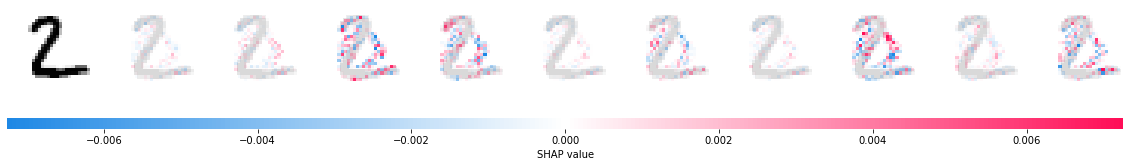

In [ ]:
shap.image_plot(shap_values, -x_test[1:2])

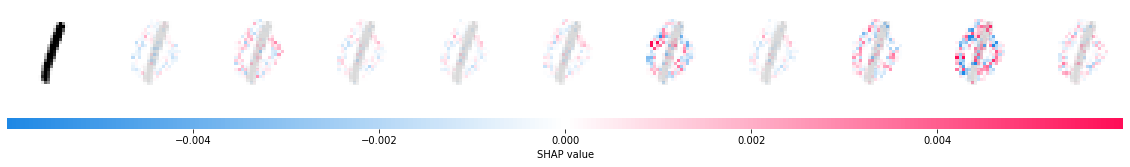

In [ ]:
shap_values = e.shap_values(x_test[5:6])
shap.image_plot(shap_values, -x_test[5:6])

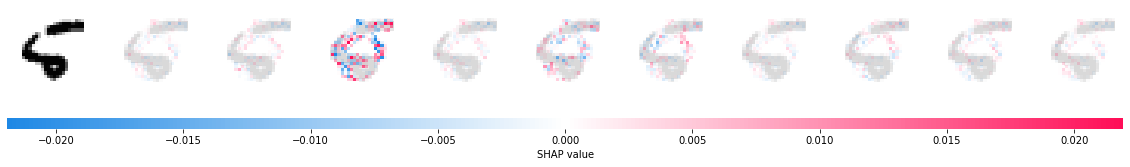

In [ ]:
shap_values = e.shap_values(x_test[8:9])

shap.image_plot(shap_values, -x_test[8:9])

In [ ]:
shap_values = e.shap_values(x_test[1:8])


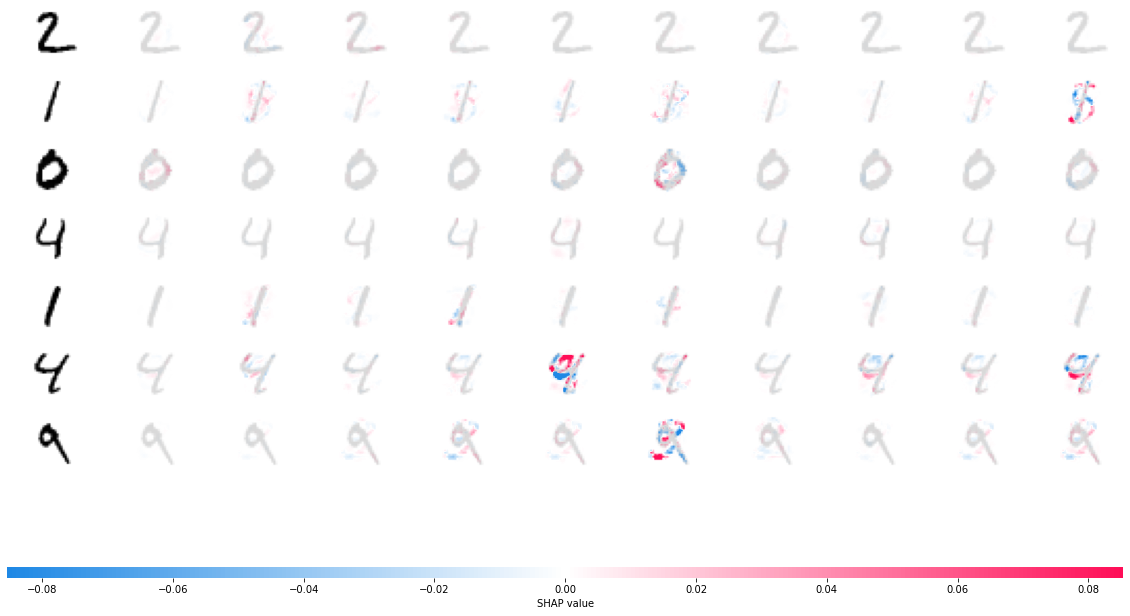

In [ ]:
shap.image_plot(shap_values, -x_test[1:8])


In [ ]:
print(np.argmax(y_test[0]))

7


In [ ]:
import matplotlib.pyplot as plt
import shap

background = x_test[3:4]
# set background here

def show_attributions(model, x_test, y_test):
    # Predict the probabilities of the digits using the test images
    output = model(x_test)
    # Get the index of the max log-probability
    pred = tf.argmax(output, 1)#[1]
    print(pred)
    # Convert to numpy only once to save time
    pred_np = pred.numpy() 

    expl = shap.DeepExplainer(model, background)
    for i in range(0, len(x_test)):
        ti = x_test[[i]]
        sv = expl.shap_values(ti)
        sn = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in sv]
        tn = np.swapaxes(np.swapaxes(ti, 1, -1), 1, 2)

        # Prepare the attribution plot, but do not draw it yet
        # We will add more info to the plots later in the code
        shap.image_plot(sv, -ti, show=False)

        # Prepare to augment the plot
        fig = plt.gcf()
        allaxes = fig.get_axes()

        # Show the actual/predicted class
        allaxes[0].set_title('Actual: {}, pred: {}'.format(
            np.argmax(y_test[i]), pred_np[i]))

        # Show the probability of each class
        # There are 11 axes for each picture: 1 for the digit + 10 for each SHAP
        # There is a last axis for the scale - we don't want to apply a label for that one
        prob = output[i].numpy()
        for x in range(1, len(allaxes)-1):
            allaxes[x].set_title('{:.2%}'.format(prob[x-1]), fontsize=14)
        plt.show()
    return output,sv


In [ ]:
test_data = x_test[5:8]
y_test_data = y_test[5:8]
trained_model = tf.keras.models.load_model("/ep10/content/ep10")
untrained_model = tf.keras.models.load_model("/content/ep2")

tf.Tensor([1 4 8], shape=(3,), dtype=int64)


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


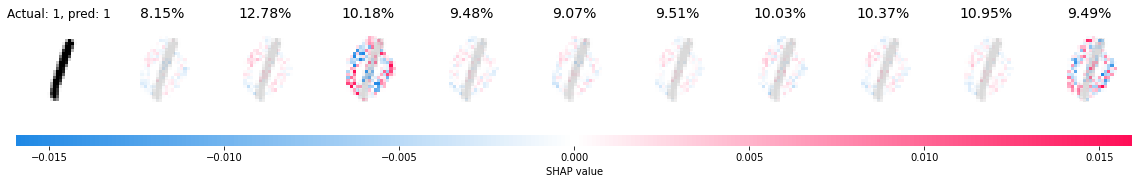

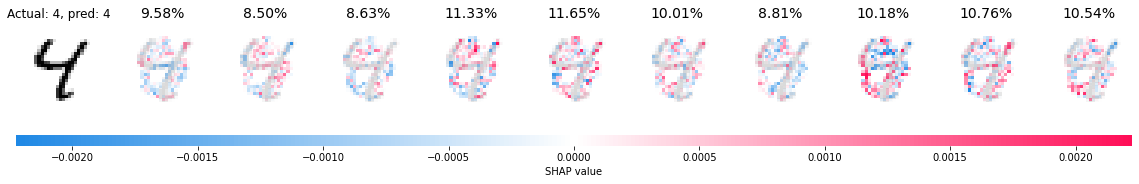

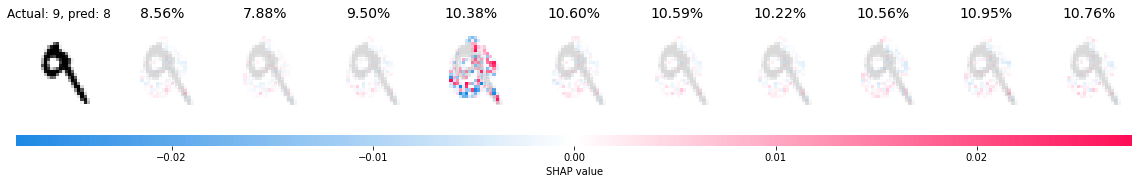

tf.Tensor([1 4 9], shape=(3,), dtype=int64)


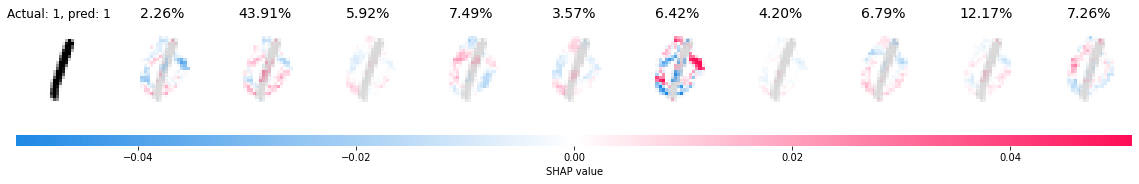

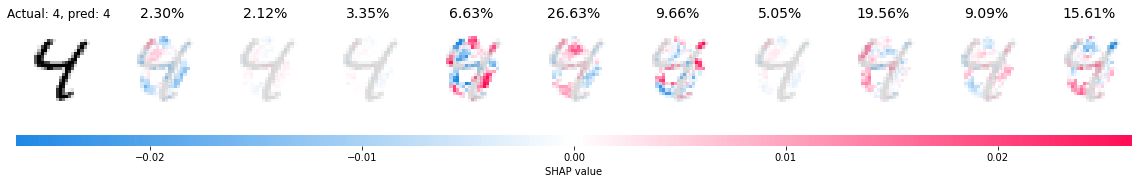

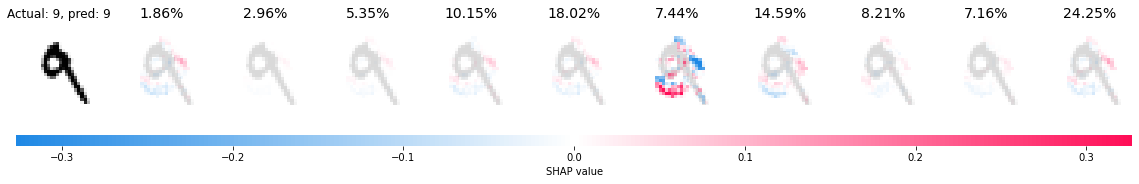

In [ ]:
_,_ = show_attributions(untrained_model, test_data, y_test_data)
_,_ = show_attributions(trained_model, test_data, y_test_data)

tf.Tensor([4], shape=(1,), dtype=int64)


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


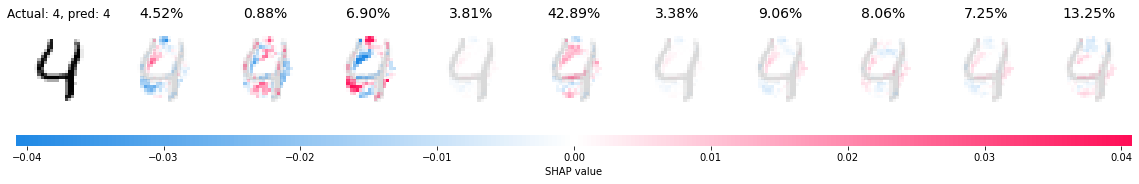

tf.Tensor([4], shape=(1,), dtype=int64)


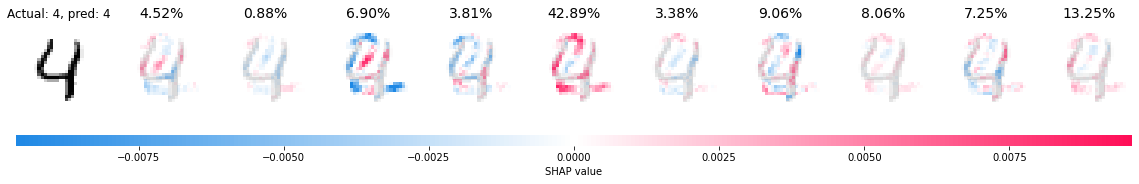

In [ ]:
test1,y1 = x_test[4:5], y_test[4:5]
test2,y2 = x_test[6:7], y_test[6:7]
background = x_test[3:4]
p1, sv1 = show_attributions(trained_model, test1,y1)
background = x_test[1:2]
p2, sv2 = show_attributions(trained_model,test1,y1)

In [ ]:
# For percentage calculations

del_sv = (p1-p2)*sv1
